# Import Libraries

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Importing Dataset

In [17]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT']

end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
# Define the company list and their respective names
company_list = [AAPL, GOOG, MSFT]
company_name = ["APPLE", "GOOGLE", "MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-08-23,416.980011,419.260010,412.089996,416.790009,416.790009,18493800,MICROSOFT
2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800,MICROSOFT
2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900,MICROSOFT
2024-08-28,414.880005,415.000000,407.309998,410.600006,410.600006,14882700,MICROSOFT
2024-08-29,414.940002,422.049988,410.600006,413.119995,413.119995,17045200,MICROSOFT
2024-08-30,415.600006,417.489990,412.130005,417.140015,417.140015,24308300,MICROSOFT
2024-09-03,417.910004,419.880005,407.029999,409.440002,409.440002,20313600,MICROSOFT
2024-09-04,405.910004,411.239990,404.369995,408.899994,408.899994,15135800,MICROSOFT
2024-09-05,407.619995,413.100006,406.130005,408.390015,408.390015,14195500,MICROSOFT


# Data Preprocessing

In [19]:
AAPL.describe()
#We have only 255 records in one year because weekends are not included in the data

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,49.528726,50.059723,49.019957,49.560612,47.840820,3.960735e+08
std,59.329027,59.969874,58.735210,59.378285,59.326726,3.994369e+08
min,0.628571,0.633571,0.621071,0.628571,0.530813,2.404830e+07
25%,6.734643,6.789286,6.626965,6.723036,5.677438,1.041079e+08
50%,24.000000,24.211249,23.781072,24.017500,21.481439,2.477368e+08
75%,55.736250,56.237500,55.027499,55.774376,53.426531,5.706631e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.372970e+09


In [20]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-09-08 to 2024-09-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5034 non-null   float64
 1   High          5034 non-null   float64
 2   Low           5034 non-null   float64
 3   Close         5034 non-null   float64
 4   Adj Close     5034 non-null   float64
 5   Volume        5034 non-null   int64  
 6   company_name  5034 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 314.6+ KB


# Exploratory Data Analysis

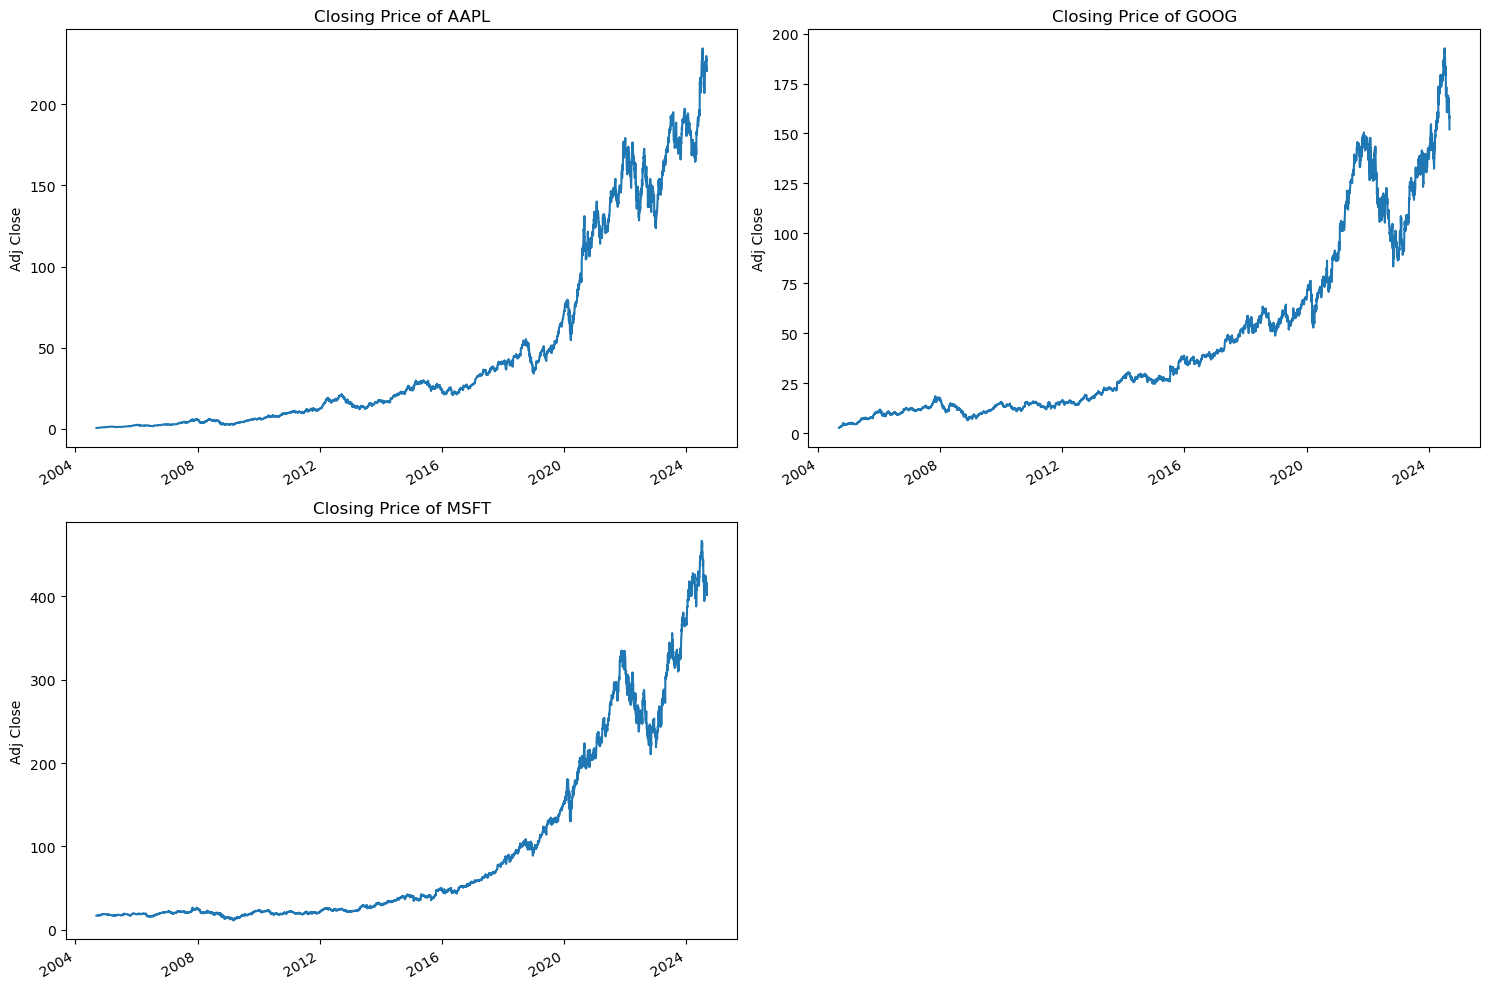

In [21]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

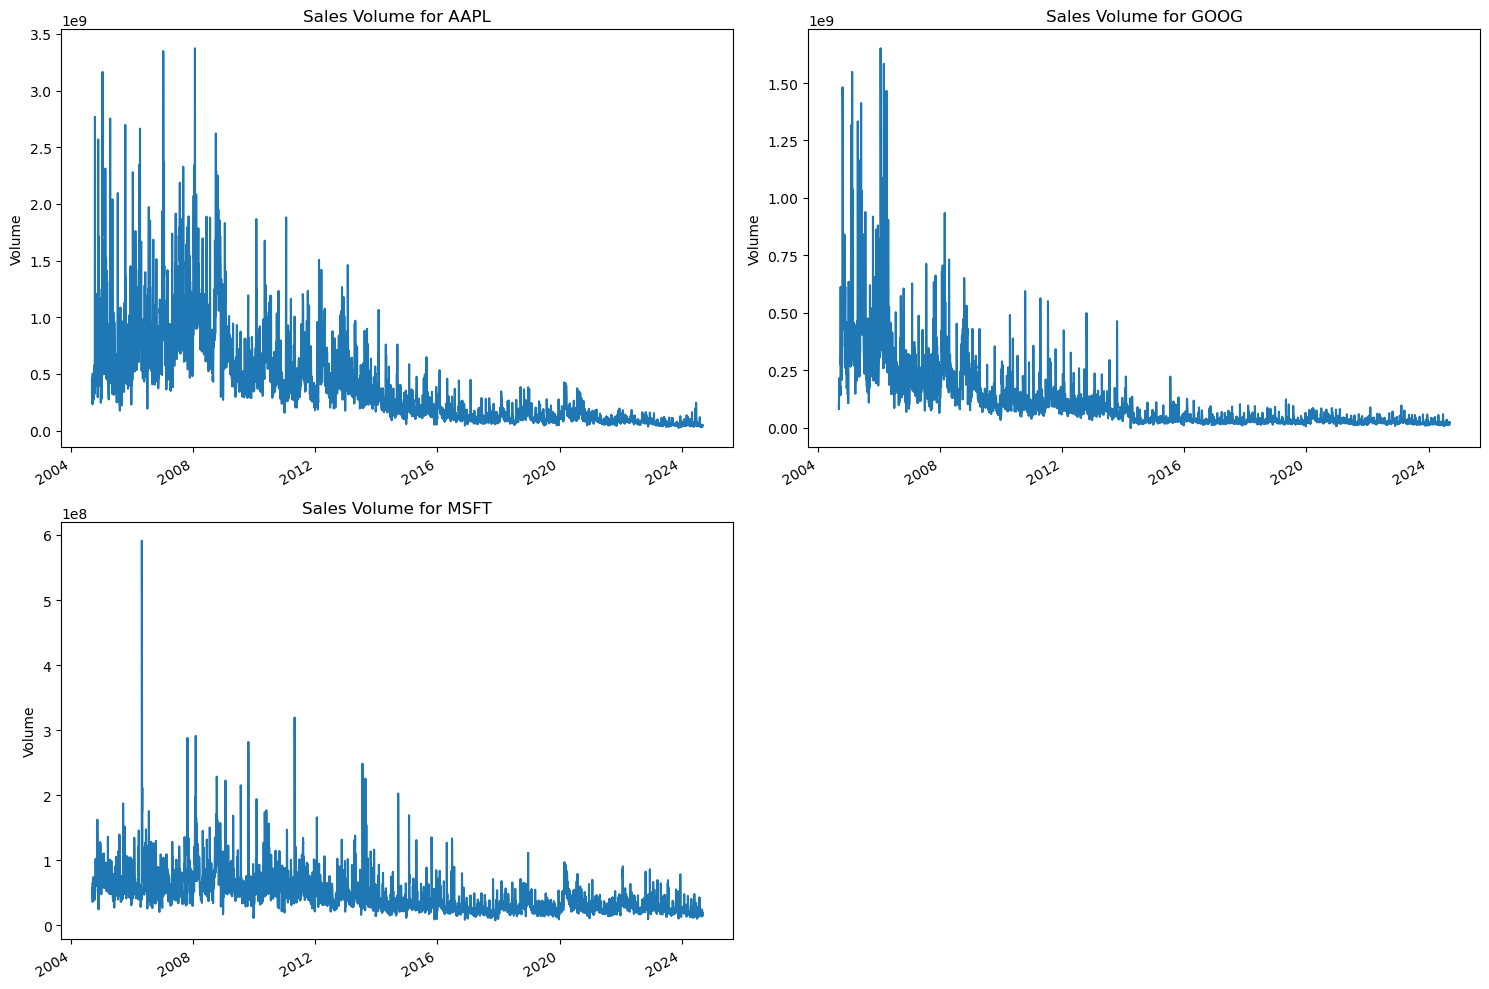

In [22]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## Observation using different days moving Average

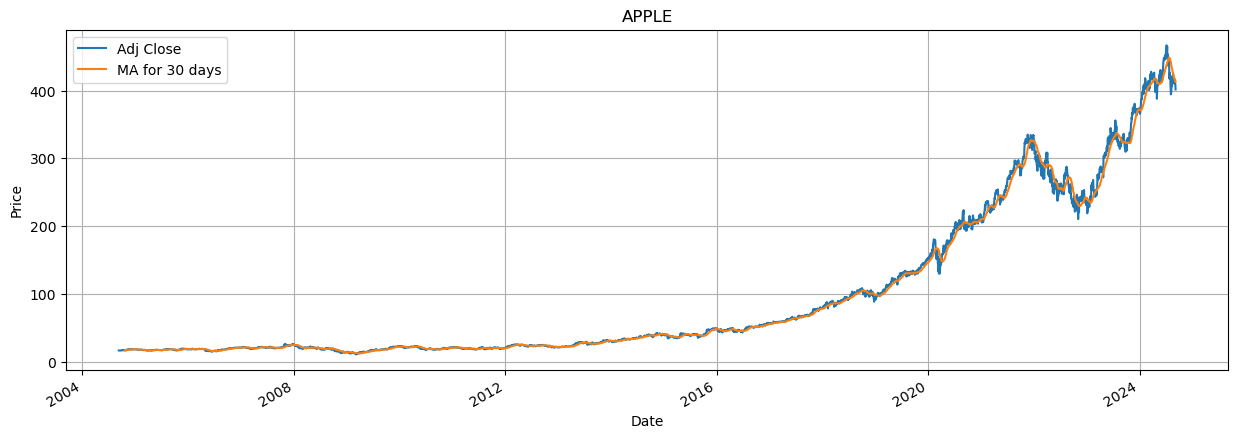

In [23]:
# Calculate moving averages for a single company 
ma_day = [30]

for ma in ma_day:
    MSFT[f"MA for {ma} days"] = MSFT['Adj Close'].rolling(ma).mean()

# Plotting the data for AAPL with increased width
MSFT[['Adj Close', 'MA for 30 days']].plot(figsize=(15, 5))  # Increased width to 20
plt.title('APPLE')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

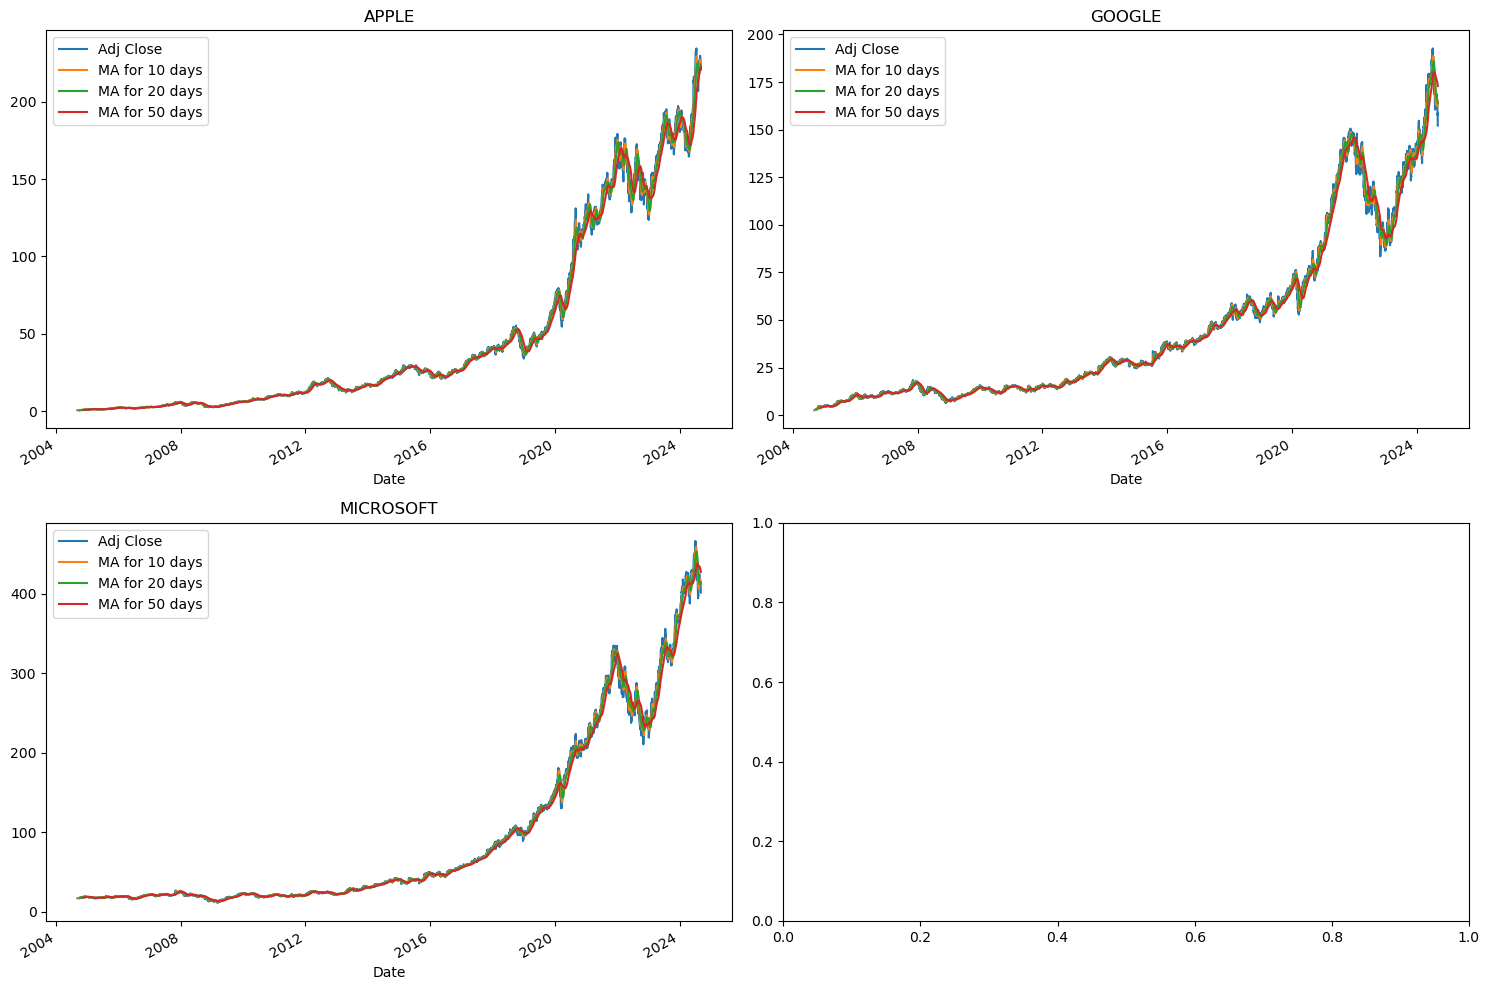

In [24]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')


fig.tight_layout()


# Normalizing and Training of model

In [25]:
company_data = {}
for stock in tech_list:
    data = yf.download(stock, start, end)
    Adj_close_price = data[['Adj Close']]
    
    # Scaling the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(Adj_close_price)
    
    # Prepare the dataset for LSTM
    x_data = []
    y_data = []
    
    for i in range(20, len(scaled_data)):
        x_data.append(scaled_data[i-20:i])
        y_data.append(scaled_data[i])
    
    x_data, y_data = np.array(x_data), np.array(y_data)
    
    # Split the data into training and testing sets
    splitting_len = int(len(x_data) * 0.7)
    x_train = x_data[:splitting_len]
    y_train = y_data[:splitting_len]
    x_test = x_data[splitting_len:]
    y_test = y_data[splitting_len:]
    
    # Store the results in a dictionary for each company
    company_data[stock] = {
        'Adj_close_price': Adj_close_price,
        'scaled_data': scaled_data,
        'x_train': x_train,
        'y_train': y_train,
        'x_test': x_test,
        'y_test': y_test,
        'scaler': scaler
    }
    
    print(f"Processed {stock}: x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


[*********************100%%**********************]  1 of 1 completed


Processed AAPL: x_train shape: (3509, 20, 1), y_train shape: (3509, 1), x_test shape: (1505, 20, 1), y_test shape: (1505, 1)


[*********************100%%**********************]  1 of 1 completed


Processed GOOG: x_train shape: (3509, 20, 1), y_train shape: (3509, 1), x_test shape: (1505, 20, 1), y_test shape: (1505, 1)


[*********************100%%**********************]  1 of 1 completed

Processed MSFT: x_train shape: (3509, 20, 1), y_train shape: (3509, 1), x_test shape: (1505, 20, 1), y_test shape: (1505, 1)


# Applying LSTM 

### Using 20 Epochs

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Iterate over each company's data in the company_data dictionary
for stock, data in company_data.items():
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    print(f"Training model for {stock}...")
    model.fit(x_train, y_train, batch_size=32, epochs=20)

    # Evaluate the model on the test set
    loss = model.evaluate(x_test, y_test, verbose=0)
    print(f"Model for {stock} trained. Test Loss: {loss:.4f}")

    # Save the model if necessary
    model.save(f'{stock}_model.h5')
    print(f"Model for {stock} saved successfully.")


Training model for AAPL...
Epoch 1/20
110/110 [==============================] - 12s 52ms/step - loss: 1.9841e-04
Epoch 2/20
110/110 [==============================] - 5s 48ms/step - loss: 8.8810e-06
Epoch 3/20
110/110 [==============================] - 6s 58ms/step - loss: 8.9914e-06
Epoch 4/20
110/110 [==============================] - 6s 56ms/step - loss: 9.7505e-06
Epoch 5/20
110/110 [==============================] - 6s 55ms/step - loss: 7.9699e-06
Epoch 6/20
110/110 [==============================] - 6s 55ms/step - loss: 1.0132e-05
Epoch 7/20
110/110 [==============================] - 5s 49ms/step - loss: 8.1364e-06
Epoch 8/20
110/110 [==============================] - 5s 49ms/step - loss: 7.7545e-06
Epoch 9/20
110/110 [==============================] - 5s 46ms/step - loss: 8.3869e-06
Epoch 10/20
110/110 [==============================] - 5s 45ms/step - loss: 9.9408e-06
Epoch 11/20
110/110 [==============================] - 5s 47ms/step - loss: 6.9154e-06
Epoch 12/20
110/110 [===

### Using 50 Epochs

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Iterate over each company's data in the company_data dictionary
for stock, data in company_data.items():
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    print(f"Training model for {stock}...")
    model.fit(x_train, y_train, batch_size=32, epochs=50)

    # Evaluate the model on the test set
    loss = model.evaluate(x_test, y_test, verbose=0)
    print(f"Model for {stock} trained. Test Loss: {loss:.4f}")

    # Save the model if necessary
    model.save(f'{stock}_model.h5')
    print(f"Model for {stock} saved successfully.")


Training model for AAPL...
Epoch 1/50
110/110 [==============================] - 32s 73ms/step - loss: 2.9950e-04
Epoch 2/50
110/110 [==============================] - 7s 67ms/step - loss: 8.7625e-06
Epoch 3/50
110/110 [==============================] - 7s 65ms/step - loss: 9.0486e-06
Epoch 4/50
110/110 [==============================] - 7s 62ms/step - loss: 9.0079e-06
Epoch 5/50
110/110 [==============================] - 7s 63ms/step - loss: 8.1322e-06
Epoch 6/50
110/110 [==============================] - 7s 66ms/step - loss: 8.6870e-06
Epoch 7/50
110/110 [==============================] - 7s 63ms/step - loss: 1.2345e-05
Epoch 8/50
110/110 [==============================] - 6s 57ms/step - loss: 8.9827e-06
Epoch 9/50
110/110 [==============================] - 6s 53ms/step - loss: 8.3119e-06
Epoch 10/50
110/110 [==============================] - 7s 60ms/step - loss: 7.4785e-06
Epoch 11/50
110/110 [==============================] - 7s 65ms/step - loss: 7.0035e-06
Epoch 12/50
110/110 [===

### Using 100 Epochs

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Iterate over each company's data in the company_data dictionary
for stock, data in company_data.items():
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    print(f"Training model for {stock}...")
    model.fit(x_train, y_train, batch_size=32, epochs=100)

    # Evaluate the model on the test set
    loss = model.evaluate(x_test, y_test, verbose=0)
    print(f"Model for {stock} trained. Test Loss: {loss:.4f}")

    # Save the model if necessary
    model.save(f'{stock}_model.h5')
    print(f"Model for {stock} saved successfully.")


Training model for AAPL...
Epoch 1/100
110/110 [==============================] - 14s 61ms/step - loss: 2.1573e-04
Epoch 2/100
110/110 [==============================] - 6s 52ms/step - loss: 7.6374e-06
Epoch 3/100
110/110 [==============================] - 6s 54ms/step - loss: 7.6410e-06
Epoch 4/100
110/110 [==============================] - 6s 59ms/step - loss: 7.5879e-06
Epoch 5/100
110/110 [==============================] - 6s 54ms/step - loss: 8.6260e-06
Epoch 6/100
110/110 [==============================] - 6s 52ms/step - loss: 7.3114e-06
Epoch 7/100
110/110 [==============================] - 6s 53ms/step - loss: 7.7568e-06
Epoch 8/100
110/110 [==============================] - 6s 53ms/step - loss: 6.8744e-06
Epoch 9/100
110/110 [==============================] - 6s 53ms/step - loss: 6.6715e-06
Epoch 10/100
110/110 [==============================] - 6s 53ms/step - loss: 8.3508e-06
Epoch 11/100
110/110 [==============================] - 6s 54ms/step - loss: 8.9633e-06
Epoch 12/100


110/110 [==============================] - 4s 36ms/step - loss: 5.9938e-06
Epoch 86/100
110/110 [==============================] - 4s 37ms/step - loss: 7.3165e-06
Epoch 87/100
110/110 [==============================] - 4s 37ms/step - loss: 5.9125e-06
Epoch 88/100
110/110 [==============================] - 4s 37ms/step - loss: 5.0159e-06
Epoch 89/100
110/110 [==============================] - 4s 36ms/step - loss: 6.2438e-06
Epoch 90/100
110/110 [==============================] - 4s 37ms/step - loss: 6.1289e-06
Epoch 91/100
110/110 [==============================] - 4s 37ms/step - loss: 5.2487e-06
Epoch 92/100
110/110 [==============================] - 4s 37ms/step - loss: 4.6423e-06
Epoch 93/100
110/110 [==============================] - 4s 36ms/step - loss: 5.7628e-06
Epoch 94/100
110/110 [==============================] - 4s 37ms/step - loss: 5.5353e-06
Epoch 95/100
110/110 [==============================] - 4s 37ms/step - loss: 5.5342e-06
Epoch 96/100
110/110 [=======================

In [40]:
# Example code to access and use the model
for stock, data in company_data.items():
    model = data.get('model')  # Safely get the model
    if model is not None:
        x_test = data['x_test']
        y_test = data['y_test']
        # Make predictions
        predictions = model.predict(x_test)
        # Process predictions as needed
    else:
        print(f"No model found for {stock}.")


48/48 [==============================] - 1s 14ms/step


In [41]:
# Store the model in the dictionary
company_data[stock]['model'] = model
    
    # Print model summary and shapes for verification
print(f"Trained model for {stock}")
model.summary()

Trained model for MSFT
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 20, 128)           66560     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_16 (Dense)            (None, 25)                1625      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


# Prediction and Evaluation

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Dictionary to store results for all companies
all_results = {}

# Dictionary to store RMSE for all companies
rmse_results = {}

# Loop through each company in the tech list
for stock in tech_list:
    # Extract relevant data and model for the current stock
    x_test = company_data[stock]['x_test']
    scaler = company_data[stock]['scaler']
    y_test = company_data[stock]['y_test']
    model = company_data[stock]['model']
    
    # Make predictions
    predictions = model.predict(x_test)
    
    # Inverse transform the predictions and actual values
    inv_predictions = scaler.inverse_transform(predictions)
    inv_y_test = scaler.inverse_transform(y_test)
    
    # Store results in the all_results dictionary
    all_results[stock] = {
        'predictions': inv_predictions,
        'actual': inv_y_test
    }
    
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(inv_y_test, inv_predictions))
    rmse_results[stock] = rmse

# Print the results and RMSE for all companies
for stock, result in all_results.items():
    print(f"\nResults for {stock}:")
    print(f"Predictions (first 5): {result['predictions'].flatten()[:5]}")  # Displaying first 5 for brevity
    print(f"Actual Values (first 5): {result['actual'].flatten()[:5]}")     # Displaying first 5 for brevity
    print(f"Prediction Shape: {result['predictions'].shape}")
    print(f"Actual Shape: {result['actual'].shape}")

# Print RMSE results
for stock, rmse in rmse_results.items():
    print(f"\nRMSE for {stock}: {rmse:.2f}")


48/48 [==============================] - 1s 18ms/step

Results for AAPL:
Predictions (first 5): [53.58235  53.65898  53.752445 53.591244 53.351   ]
Actual Values (first 5): [53.93413544 53.32190704 51.90216446 51.98791885 52.01889038]
Prediction Shape: (1505, 1)
Actual Shape: (1505, 1)

Results for GOOG:
Predictions (first 5): [58.778717 58.74673  58.78651  58.71283  58.634518]
Actual Values (first 5): [58.6996994  58.55986023 57.73680115 57.99500656 58.48794556]
Prediction Shape: (1505, 1)
Actual Shape: (1505, 1)

Results for MSFT:
Predictions (first 5): [103.89138 104.40262 105.02143 105.44564 105.85356]
Actual Values (first 5): [106.17750549 106.61010742 105.45342255 106.4596405  105.03968048]
Prediction Shape: (1505, 1)
Actual Shape: (1505, 1)

RMSE for AAPL: 4.02

RMSE for GOOG: 2.88

RMSE for MSFT: 6.31


# Visualizing Actual and predicted values

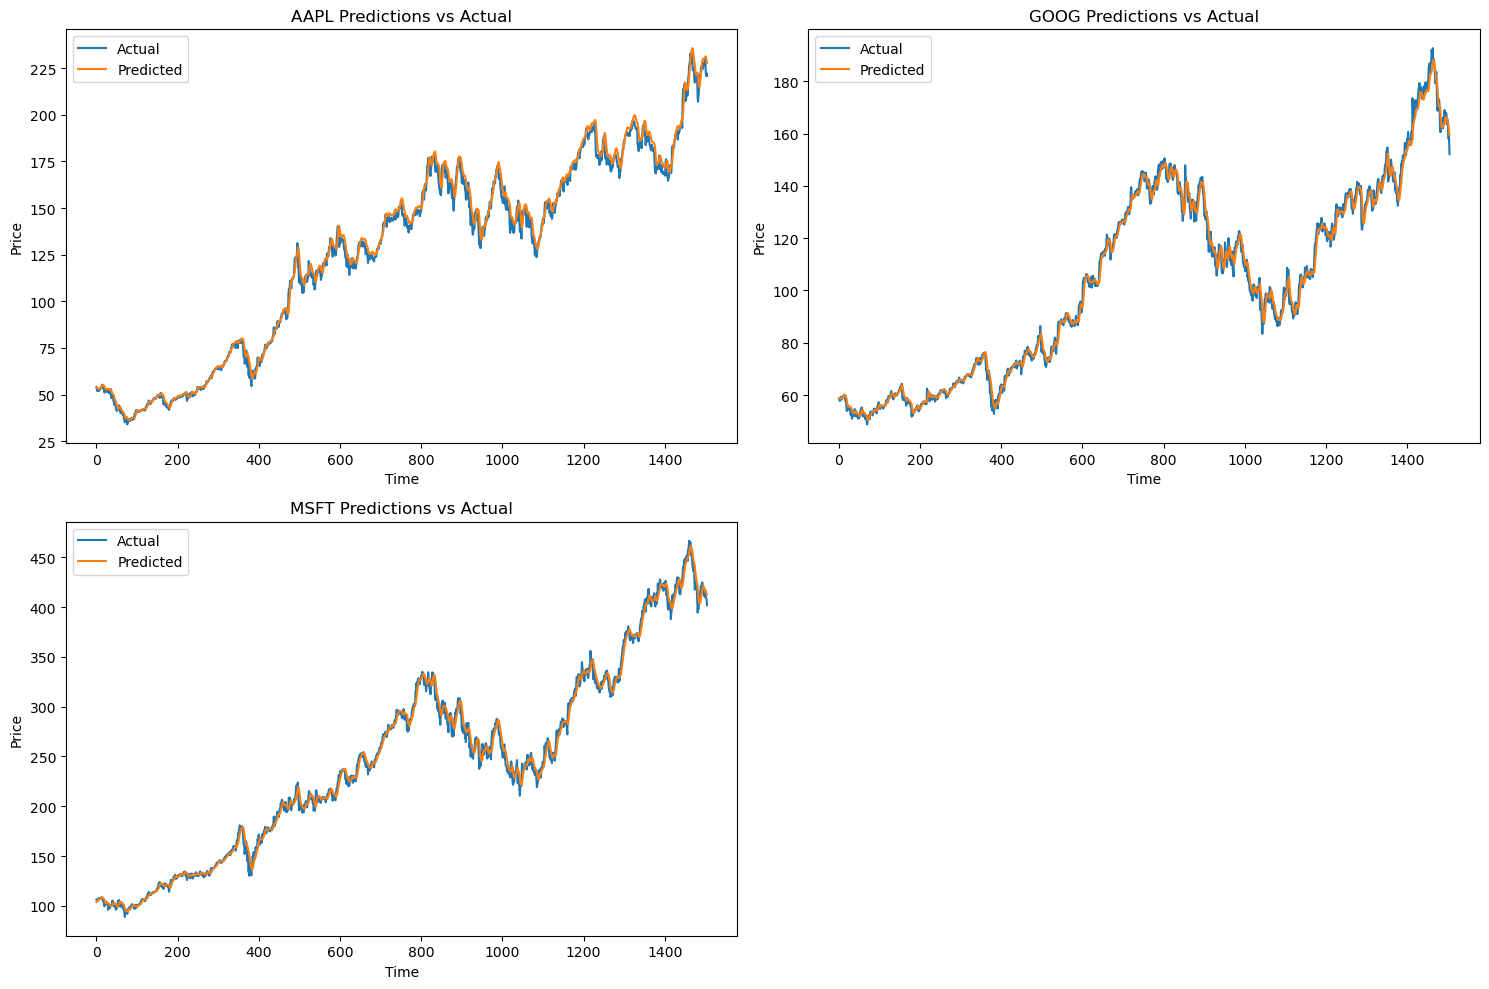

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, stock in enumerate(tech_list):
    plt.subplot(2, 2, i + 1)
    plt.plot(all_results[stock]['actual'], label='Actual')
    plt.plot(all_results[stock]['predictions'], label='Predicted')
    plt.title(f'{stock} Predictions vs Actual')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()


In [35]:
# Dictionary to store predictions and actual prices for each company
today_predictions = {}

# Loop through each company in the tech list
for stock in tech_list:
    # Get the last 100 days of adjusted closing prices
    last_100_days = company_data[stock]['Adj_close_price'][-100:]
    
    # Scale the data to be between 0 and 1
    scaler = company_data[stock]['scaler']
    scaled_last_100_days = scaler.transform(last_100_days)
    
    # Reshape the data to match the model's input shape
    scaled_last_100_days = np.array(scaled_last_100_days)
    scaled_last_100_days = np.reshape(scaled_last_100_days, (1, scaled_last_100_days.shape[0], 1))
    
    # Predict the closing price for today
    model = company_data[stock]['model']
    predicted_price_today = model.predict(scaled_last_100_days)
    
    # Inverse transform to get the actual predicted price
    predicted_price_today = scaler.inverse_transform(predicted_price_today)
    predicted_price_today = predicted_price_today[0][0]
    
    # Get the actual closing price for today from the data using .iloc
    actual_price_today = last_100_days.iloc[-1, 0]
    
    # Store the results in the dictionary
    today_predictions[stock] = {
        'predicted_price': predicted_price_today,
        'actual_price': actual_price_today
    }
    
    # Display the predicted and actual prices
    print(f"{stock} - Predicted closing price for today: ${predicted_price_today:.2f}")
    print(f"{stock} - Actual closing price for today: ${actual_price_today:.2f}")




1/1 [==============================] - 1s 1s/step
AAPL - Predicted closing price for today: $229.32
AAPL - Actual closing price for today: $220.82
1/1 [==============================] - 2s 2s/step
GOOG - Predicted closing price for today: $158.86
GOOG - Actual closing price for today: $152.13
1/1 [==============================] - 1s 1s/step
MSFT - Predicted closing price for today: $412.31
MSFT - Actual closing price for today: $401.70


In [36]:
# Dictionary to store predictions and actual prices for each company
yesterday_predictions = {}

# Loop through each company in the tech list
for stock in tech_list:
    # Get the last 100 days of data up until yesterday
    last_100_days_yesterday = company_data[stock]['Adj_close_price'][-101:-1]
    
    # Scale the data
    scaler = company_data[stock]['scaler']
    scaled_last_100_days_yesterday = scaler.transform(last_100_days_yesterday)
    
    # Reshape the data to match the model's input shape
    scaled_last_100_days_yesterday = np.array(scaled_last_100_days_yesterday)
    scaled_last_100_days_yesterday = np.reshape(scaled_last_100_days_yesterday, (1, scaled_last_100_days_yesterday.shape[0], 1))
    
    # Predict the closing price for today using data up until yesterday
    model = company_data[stock]['model']
    predicted_price_yesterday = model.predict(scaled_last_100_days_yesterday)
    
    # Inverse transform to get the actual predicted price
    predicted_price_yesterday = scaler.inverse_transform(predicted_price_yesterday)
    predicted_price_yesterday = predicted_price_yesterday[0][0]
    
    # Get the actual closing price for today
    actual_price_today = company_data[stock]['Adj_close_price'].iloc[-1, 0]
    
    # Store the results in the dictionary
    yesterday_predictions[stock] = {
        'predicted_price': predicted_price_yesterday,
        'actual_price': actual_price_today
    }
    
    # Display the predicted and actual prices
    print(f"{stock} - Predicted closing price for today (using yesterday's data): ${predicted_price_yesterday:.2f}")
    print(f"{stock} - Actual closing price for today: ${actual_price_today:.2f}")




1/1 [==============================] - 0s 50ms/step
AAPL - Predicted closing price for today (using yesterday's data): $230.66
AAPL - Actual closing price for today: $220.82
1/1 [==============================] - 0s 51ms/step
GOOG - Predicted closing price for today (using yesterday's data): $161.01
GOOG - Actual closing price for today: $152.13
1/1 [==============================] - 0s 64ms/step
MSFT - Predicted closing price for today (using yesterday's data): $414.20
MSFT - Actual closing price for today: $401.70


# Dynamic Investment 

In [44]:
# Initial investment amount
initial_money = 1000  # Start with 1000 pounds

# Dictionary to store daily investments
investment_history = {
    'day': [],
    'stock': [],
    'amount': [],
    'stocks_owned': [],
    'actual_price': [],
    'predicted_price': [],
    'total_value': []
}

# Initialize investment in a random or chosen stock on the first day
current_stock = tech_list[0]  # Start with the first stock in the list (e.g., AAPL)
current_price = company_data[current_stock]['Adj_close_price'].iloc[-1, 0]
stocks_owned = initial_money / current_price  # Calculate how many stocks can be bought

# Store initial investment details
investment_history['day'].append(0)
investment_history['stock'].append(current_stock)
investment_history['amount'].append(initial_money)
investment_history['stocks_owned'].append(stocks_owned)
investment_history['actual_price'].append(current_price)
investment_history['predicted_price'].append(yesterday_predictions[current_stock]['predicted_price'])
investment_history['total_value'].append(initial_money)

# Loop for the last 5 days investment strategy
for day in range(1, 6):  # Last 5 days
    # Find the stock with the highest predicted growth
    best_stock = None
    best_predicted_growth = -np.inf
    
    for stock in tech_list:
        yesterday_predicted = yesterday_predictions[stock]['predicted_price']
        today_actual = company_data[stock]['Adj_close_price'].iloc[-1 - day, 0]
        predicted_growth = (yesterday_predicted - today_actual) / today_actual
        
        if predicted_growth > best_predicted_growth:
            best_predicted_growth = predicted_growth
            best_stock = stock

    # If the best stock is not the current stock, sell current holdings and reinvest in the best stock
    if best_stock != current_stock:
        # Sell current stock holdings
        money_available = stocks_owned * current_price
        
        # Update to new stock and recalculate stocks_owned
        current_stock = best_stock
        current_price = company_data[current_stock]['Adj_close_price'].iloc[-1 - day, 0]
        stocks_owned = money_available / current_price
    
    # Update the investment history
    investment_history['day'].append(day)
    investment_history['stock'].append(current_stock)
    investment_history['amount'].append(money_available)
    investment_history['stocks_owned'].append(stocks_owned)
    investment_history['actual_price'].append(current_price)
    investment_history['predicted_price'].append(yesterday_predictions[current_stock]['predicted_price'])
    investment_history['total_value'].append(stocks_owned * current_price)

    # Print the daily investment details
    print(f"Day {day}: Invested in {current_stock}")
    print(f"Actual Price: {current_price:.2f}, Predicted Price: {yesterday_predictions[current_stock]['predicted_price']:.2f}")
    print(f"Total Value: {stocks_owned * current_price:.2f}\n")

# Final Results
print("\nFinal Investment Results:")
print(f"Total Value After Investment: {investment_history['total_value'][-1]:.2f} pounds")
print(f"Stock Held: {investment_history['stock'][-1]}")

Day 1: Invested in AAPL
Actual Price: 220.82, Predicted Price: 230.66
Total Value: 1000.00

Day 2: Invested in AAPL
Actual Price: 220.82, Predicted Price: 230.66
Total Value: 1000.00

Day 3: Invested in AAPL
Actual Price: 220.82, Predicted Price: 230.66
Total Value: 1000.00

Day 4: Invested in AAPL
Actual Price: 220.82, Predicted Price: 230.66
Total Value: 1000.00

Day 5: Invested in AAPL
Actual Price: 220.82, Predicted Price: 230.66
Total Value: 1000.00


Final Investment Results:
Total Value After Investment: 1000.00 pounds
Stock Held: AAPL
